# Assignment 2

## Regression Data Exploration Report

In [1]:
# Mark down help https://www.datacamp.com/tutorial/markdown-in-jupyter-notebook

In [2]:
import pandas as pd
import numpy as np
#Show max 100 columns or rows
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
#Dont use scientific notation for numbers (e.g 1.003767687e-12)
pd.set_option('display.float_format','{:.5f}'.format)
np.set_printoptions(suppress=True)

### Background

Being a volunteer reservist on a university squadron within the RAF, and having been on some training flights myself in a Tutor T1 (see: https://www.raf.mod.uk/aircraft/tutor-t1/ ), the following is something talked about in our safety handbook - bird strikes. 
It is a very real possibility that this can happen and is featured in the morning briefing once a month before flights take place. 

### The Dataset

'The dataset contains a record of each reported wildlife strike of a military, commercial, or civil aircraft between 1990 and 2015. Each row contains the incident date, aircraft operator, aircraft make and model, engine make and model, airport name and location, species name and quantity, and aircraft damage.'

'The wildlife strike database was compiled from reports received from airports, airlines, and pilots and published by the Federal Aviation Association.'

>Ref: https://www.kaggle.com/datasets/faa/wildlife-strikes?select=database.csv


I'm curious to investigate the nature of these bird strikes and how realistic the occurances can be. 

In [3]:
df = pd.read_csv("data/wildlife_air_strikes.csv")

C:\Users\luoco\AppData\Local\Temp\ipykernel_4580\3252239050.py:1: DtypeWarning: Columns (9,12,15,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/wildlife_air_strikes.csv")


In [4]:
df

,Record ID,Incident Year,Incident Month,Incident Day,Operator ID,Operator,Aircraft,Aircraft Type,Aircraft Make,Aircraft Model,Aircraft Mass,Engine Make,Engine Model,Engines,Engine Type,Engine1 Position,Engine2 Position,Engine3 Position,Engine4 Position,Airport ID,Airport,State,FAA Region,Warning Issued,Flight Phase,Visibility,Precipitation,Height,Speed,Distance,Species ID,Species Name,Species Quantity,Flight Impact,Fatalities,Injuries,Aircraft Damage,Radome Strike,Radome Damage,Windshield Strike,Windshield Damage,Nose Strike,Nose Damage,Engine1 Strike,Engine1 Damage,Engine2 Strike,Engine2 Damage,Engine3 Strike,Engine3 Damage,Engine4 Strike,Engine4 Damage,Engine Ingested,Propeller Strike,Propeller Damage,Wing or Rotor Strike,Wing or Rotor Damage,Fuselage Strike,Fuselage Damage,Landing Gear Strike,Landing Gear Damage,Tail Strike,Tail Damage,Lights Strike,Lights Damage,Other Strike,Other Damage
0,127128,1990,1,1,DAL,DELTA AIR LINES,B-757-200,A,148,26,4.00000,34.00000,40,2.00000,D,1,1.00000,NaN,NaN,KCVG,CINCINNATI/NORTHERN KENTUCKY INTL ARPT,KY,ASO,NaN,CLIMB,NaN,NaN,NaN,NaN,NaN,NE1,GULL,1,NaN,NaN,NaN,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
1,129779,1990,1,1,HAL,HAWAIIAN AIR,DC-9,A,583,90,4.00000,34.00000,10,2.00000,D,5,5.00000,NaN,NaN,PHLI,LIHUE ARPT,HI,AWP,NaN,TAKEOFF RUN,NaN,NaN,0.00000,NaN,0.00000,ZZ201,HOUSE SPARROW,1,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,129780,1990,1,2,UNK,UNKNOWN,UNKNOWN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PHLI,LIHUE ARPT,HI,AWP,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,R1101,BARN OWL,1,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2258,1990,1,3,MIL,MILITARY,A-10A,A,345,NaN,3.00000,22.00000,NaN,2.00000,D,NaN,NaN,NaN,NaN,KMYR,MYRTLE BEACH INTL,SC,ASO,NaN,APPROACH,DAY,NaN,200.00000,138.00000,NaN,UNKBM,UNKNOWN MEDIUM BIRD,1,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,2257,1990,1,3,MIL,MILITARY,F-16,A,561,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KJAX,JACKSONVILLE INTL,FL,ASO,NaN,CLIMB,DAY,NaN,100.00000,200.00000,NaN,ZX,FINCH,1,NaN,NaN,NaN,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174099,366091,2015,9,30,SWA,SOUTHWEST AIRLINES,B-737-700,A,148,42.00000,4.00000,10.00000,1,2.00000,D,1.00000,1.00000,NaN,NaN,UNKN,NaN,NaN,NaN,N,NaN,NaN,NONE,NaN,NaN,NaN,UNKBS,UNKNOWN SMALL BIRD,1,NONE,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
174100,365902,2015,9,30,SWA,SOUTHWEST AIRLINES,B-737-700,A,148,42.00000,4.00000,10.00000,1,2.00000,D,1.00000,1.00000,NaN,NaN,KDAL,DALLAS LOVE FIELD ARPT,TX,ASW,N,APPROACH,DAY,NONE,5000.00000,250.00000,25.00000,UNKBS,UNKNOWN SMALL BIRD,1,NONE,NaN,NaN,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
174101,365903,2015,9,30,BUS,BUSINESS,CITATIONJET,A,226,49.00000,2.00000,46.00000,1,2.00000,D,5.00000,5.00000,NaN,NaN,KMIA,MIAMI INTL,FL,ASO,NaN,CLIMB,DAY,NONE,3000.00000,200.00000,5.00000,K1002,TURKEY VULTURE,1,NONE,NaN,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0
174102,366046,2015,9,30,QXE,HORIZON AIR,DHC8 DASH 8,A,303,10.00000,3.00000,31.00000,10,2.00000,C,4.00000,4.00000,NaN,NaN,KPDX,PORTLAND INTL (OR),OR,ANM,Y,DESCENT,NIGHT,NONE,6000.00000,NaN,NaN,Z6014,HERMIT THRUSH,1,NONE,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


I will drop what I think are all negligible coloumns for this assignment to make things easier to refer to and leave the core information.

In [5]:
df = df.drop(["Record ID", "Incident Day", "Aircraft Type", "Aircraft Make", "Aircraft Model", "Aircraft Mass", "Engine Model", "Engines", "Engine Type", "Engine1 Position", "Engine2 Position", "Engine3 Position", "Engine4 Position", "Warning Issued", "Visibility", "Precipitation", "Distance", "Species ID", "Flight Impact", "Fatalities", "Injuries", "Aircraft Damage", "Radome Strike", "Radome Damage", "Windshield Strike", "Windshield Damage", "Nose Strike", "Nose Damage", "Engine1 Strike", "Engine1 Damage", "Engine2 Strike", "Engine2 Damage", "Engine3 Strike", "Engine3 Damage", "Engine4 Strike", "Engine4 Damage", "Engine Ingested", "Propeller Strike", "Propeller Damage", "Wing or Rotor Strike", "Wing or Rotor Damage", "Fuselage Strike", "Fuselage Damage", "Landing Gear Strike", "Landing Gear Damage", "Tail Strike", "Tail Damage", "Lights Strike", "Lights Damage", "Other Strike", "Other Damage" ], axis = 1)
df

,Incident Year,Incident Month,Operator ID,Operator,Aircraft,Engine Make,Airport ID,Airport,State,FAA Region,Flight Phase,Height,Speed,Species Name,Species Quantity
0,1990,1,DAL,DELTA AIR LINES,B-757-200,34.00000,KCVG,CINCINNATI/NORTHERN KENTUCKY INTL ARPT,KY,ASO,CLIMB,NaN,NaN,GULL,1
1,1990,1,HAL,HAWAIIAN AIR,DC-9,34.00000,PHLI,LIHUE ARPT,HI,AWP,TAKEOFF RUN,0.00000,NaN,HOUSE SPARROW,1
2,1990,1,UNK,UNKNOWN,UNKNOWN,NaN,PHLI,LIHUE ARPT,HI,AWP,NaN,NaN,NaN,BARN OWL,1
3,1990,1,MIL,MILITARY,A-10A,22.00000,KMYR,MYRTLE BEACH INTL,SC,ASO,APPROACH,200.00000,138.00000,UNKNOWN MEDIUM BIRD,1
4,1990,1,MIL,MILITARY,F-16,NaN,KJAX,JACKSONVILLE INTL,FL,ASO,CLIMB,100.00000,200.00000,FINCH,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174099,2015,9,SWA,SOUTHWEST AIRLINES,B-737-700,10.00000,UNKN,NaN,NaN,NaN,NaN,NaN,NaN,UNKNOWN SMALL BIRD,1
174100,2015,9,SWA,SOUTHWEST AIRLINES,B-737-700,10.00000,KDAL,DALLAS LOVE FIELD ARPT,TX,ASW,APPROACH,5000.00000,250.00000,UNKNOWN SMALL BIRD,1
174101,2015,9,BUS,BUSINESS,CITATIONJET,46.00000,KMIA,MIAMI INTL,FL,ASO,CLIMB,3000.00000,200.00000,TURKEY VULTURE,1
174102,2015,9,QXE,HORIZON AIR,DHC8 DASH 8,31.00000,KPDX,PORTLAND INTL (OR),OR,ANM,DESCENT,6000.00000,NaN,HERMIT THRUSH,1


### 1: Central Tendencies & Variation

#### Two Variables: Speed and Height.

- I think this could be interesting to look at these two to see the range in which incidences occur. 
#### Further detail: 
- Do certain species get hit at certain heights? 
- Do aircraft fly faster in certain areas? Therefore causing more/less wildlife strikes?  
- Is there a greater amount of wildlife strikes given if the aircraft is military, commercial or civil?

##### The records for height and speed have uncorrelated NaN values so it wouldn't be important to find the range of these (having needed to drop the NaN rows respectively and losing data). 
>ref: https://www.nobledesktop.com/learn/python/range-iqr-percentile-in-python#:~:text=Range%20is%20the%20simplest%20of,minimum%20values%20of%20a%20dataset.

In [6]:
from collections import Counter

mean_speed = df["Speed"].mean()
print("The Speed mean is", mean_speed)

median_speed = df["Speed"].median()
print("The Speed median is", median_speed)

mean_height = df["Height"].mean()
print("The Height mean is", mean_height)

median_height = df["Height"].median()
print("The Height median is", median_height)

The Speed mean is 141.9256223862584
The Speed median is 138.0
The Height mean is 831.0322829557182
The Height median is 50.0


### 2: Plot

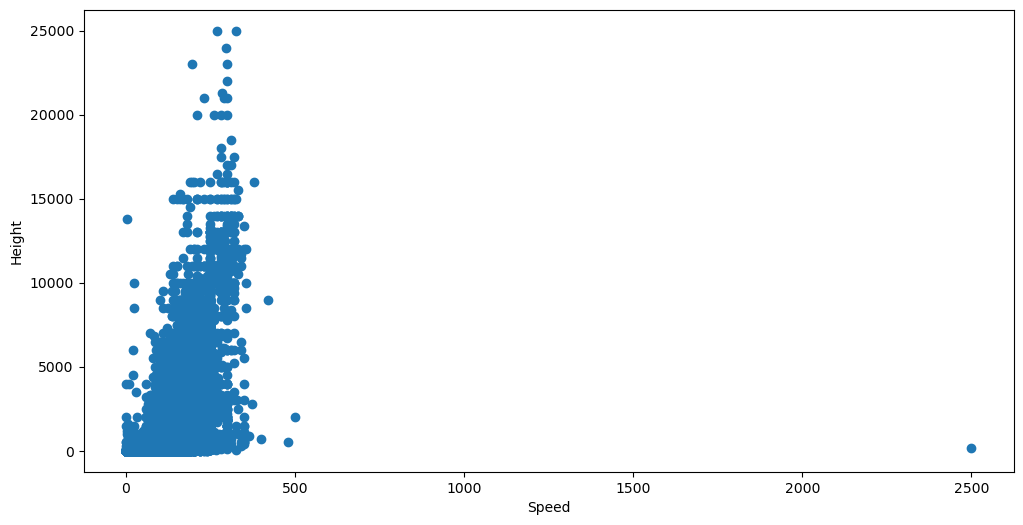

In [7]:
import matplotlib.pyplot as plt
from sklearn import preprocessing

data = df[["Speed","Height"]].values
x = data[:,0]
y = data[:,1]

def plot_scatter(x,y,xlabel,ylabel):
    fig,ax = plt.subplots(figsize = (12,6))
    ax.scatter(x,y)
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    ax.ticklabel_format(style='plain')
    return ax
ax = plot_scatter(x,y,"Speed","Height")

 - All of the rows indicate a given incident recorded/ note that the column 'Species quantity' has a '1' in every row.
 - Every dot is an incident occuring on the graph.
 - I will drop the obvious outlier (where Speed = 2500) so that we have a better fit for averages/ plot to work with. 

In [8]:
#find the position of the outlier - what row it's on in the dataframe?

print(np.where((df['Height']>1) & (df['Speed']>2000)))

#ref: https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/

(array([79493], dtype=int64),)


In [9]:
#Drop this and continue.
df = df.drop(labels=79493, axis = 0)
#axis = 0 for rows
#axis = 1 for columns

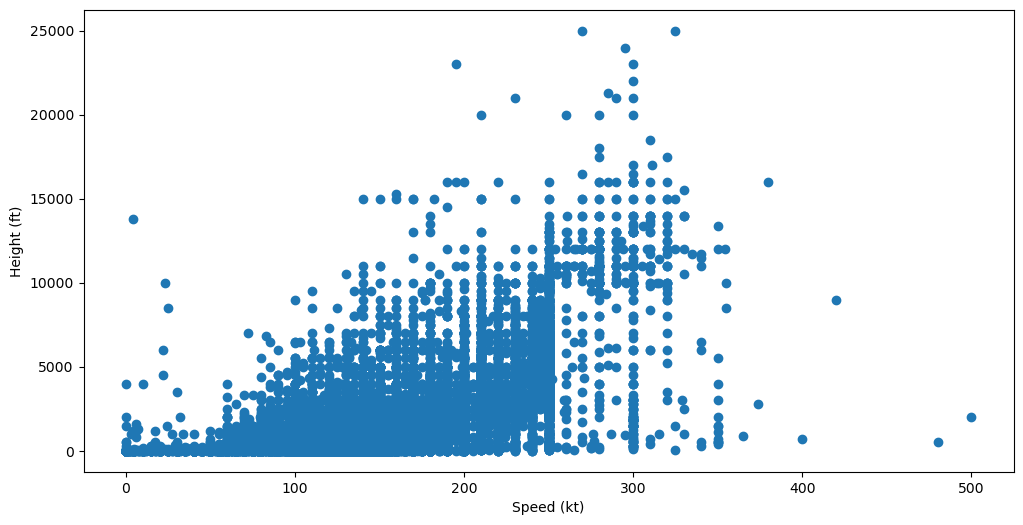

In [10]:
data = df[["Speed","Height"]].values
x = data[:,0]
y = data[:,1]

def plot_scatter(x,y,xlabel,ylabel):
    fig,ax = plt.subplots(figsize = (12,6))
    ax.scatter(x,y)
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    ax.ticklabel_format(style='plain')
    return ax
ax = plot_scatter(x,y,"Speed (kt)","Height (ft)")

#### Variable Relationship: Speed and Height
Are they correlated? How? Can we draw any conclusions from this?

> There is a clear positive correlation between the two variables. Though you could say that relatively speaking, a pilot is more likely to fly faster at a greater height, given that this data is of wildstrike occurences, the relationship of the variables suggest that a wildlife strike will more likely occur at a height of around 15000ft or less, and at a speed of 350kt or less. 
> The plot is much denser at 5000ft and below, centred around a speed of 15kt. Therefore the majority of wildlife strikes occurred in this genralised range.

### 3: Linear Model

In [11]:
from scipy import stats

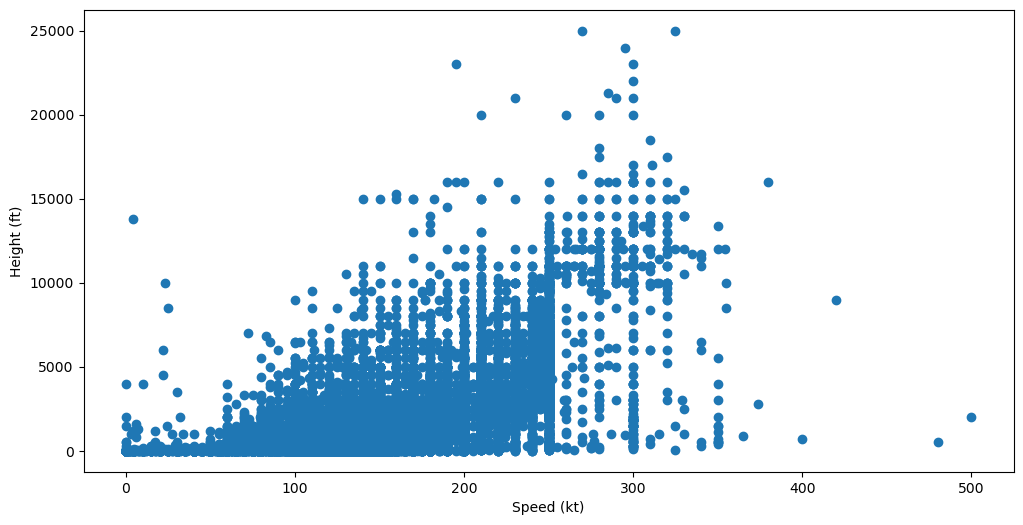

In [12]:
data = df[["Speed","Height"]].values
x = data[:,0]
y = data[:,1]
slope, intercept, r, p, std_err = stats.linregress(x, y)
slope = np.float32(slope)
model_y = [slope * i + intercept for i in x]

ax = plot_scatter(x,y,"Speed (kt)","Height (ft)")
ax.plot(x, model_y)

In [13]:
print(stats.linregress(x, y))

LinregressResult(slope=nan, intercept=nan, rvalue=nan, pvalue=nan, stderr=nan, intercept_stderr=nan)


### Having noticed the extent of which I cannot express averages and a linear model - I will remove the NaN values and repeat.

In [14]:
df

,Incident Year,Incident Month,Operator ID,Operator,Aircraft,Engine Make,Airport ID,Airport,State,FAA Region,Flight Phase,Height,Speed,Species Name,Species Quantity
0,1990,1,DAL,DELTA AIR LINES,B-757-200,34.00000,KCVG,CINCINNATI/NORTHERN KENTUCKY INTL ARPT,KY,ASO,CLIMB,NaN,NaN,GULL,1
1,1990,1,HAL,HAWAIIAN AIR,DC-9,34.00000,PHLI,LIHUE ARPT,HI,AWP,TAKEOFF RUN,0.00000,NaN,HOUSE SPARROW,1
2,1990,1,UNK,UNKNOWN,UNKNOWN,NaN,PHLI,LIHUE ARPT,HI,AWP,NaN,NaN,NaN,BARN OWL,1
3,1990,1,MIL,MILITARY,A-10A,22.00000,KMYR,MYRTLE BEACH INTL,SC,ASO,APPROACH,200.00000,138.00000,UNKNOWN MEDIUM BIRD,1
4,1990,1,MIL,MILITARY,F-16,NaN,KJAX,JACKSONVILLE INTL,FL,ASO,CLIMB,100.00000,200.00000,FINCH,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174099,2015,9,SWA,SOUTHWEST AIRLINES,B-737-700,10.00000,UNKN,NaN,NaN,NaN,NaN,NaN,NaN,UNKNOWN SMALL BIRD,1
174100,2015,9,SWA,SOUTHWEST AIRLINES,B-737-700,10.00000,KDAL,DALLAS LOVE FIELD ARPT,TX,ASW,APPROACH,5000.00000,250.00000,UNKNOWN SMALL BIRD,1
174101,2015,9,BUS,BUSINESS,CITATIONJET,46.00000,KMIA,MIAMI INTL,FL,ASO,CLIMB,3000.00000,200.00000,TURKEY VULTURE,1
174102,2015,9,QXE,HORIZON AIR,DHC8 DASH 8,31.00000,KPDX,PORTLAND INTL (OR),OR,ANM,DESCENT,6000.00000,NaN,HERMIT THRUSH,1


In [15]:
df = df.dropna()
df

,Incident Year,Incident Month,Operator ID,Operator,Aircraft,Engine Make,Airport ID,Airport,State,FAA Region,Flight Phase,Height,Speed,Species Name,Species Quantity
3,1990,1,MIL,MILITARY,A-10A,22.00000,KMYR,MYRTLE BEACH INTL,SC,ASO,APPROACH,200.00000,138.00000,UNKNOWN MEDIUM BIRD,1
10,1990,1,USA,1US AIRWAYS,B-737-200,34.00000,KMCO,ORLANDO INTL,FL,ASO,APPROACH,60.00000,150.00000,GULL,2-10
14,1990,1,SWA,SOUTHWEST AIRLINES,B-737-300,10.00000,KMSY,LOUIE ARMSTRONG NEW ORLEANS INTL ARPT,LA,ASW,TAKEOFF RUN,0.00000,140.00000,ROCK PIGEON,2-10
23,1990,1,UPS,UPS AIRLINES,DC-8,10.00000,KSDF,LOUISVILLE INTL ARPT-STANDIFORD FIELD,KY,ASO,APPROACH,300.00000,150.00000,SPARROW,2-10
36,1990,2,MIL,MILITARY,A-10A,22.00000,KAEX,ALEXANDRIA INTL,LA,ASW,APPROACH,1000.00000,145.00000,TURKEY VULTURE,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174093,2015,9,FDX,FEDEX EXPRESS,A-300,34.00000,KMEM,MEMPHIS INTL,TN,ASO,APPROACH,2000.00000,160.00000,UNKNOWN SMALL BIRD,1
174094,2015,9,AAL,AMERICAN AIRLINES,MD-83,34.00000,KDFW,DALLAS/FORT WORTH INTL ARPT,TX,ASW,CLIMB,10.00000,140.00000,UNKNOWN SMALL BIRD,1
174098,2015,9,FDX,FEDEX EXPRESS,DC-10-10,22.00000,KCLT,CHARLOTTE/DOUGLAS INTL ARPT,NC,ASO,CLIMB,2000.00000,210.00000,UNKNOWN SMALL BIRD,1
174100,2015,9,SWA,SOUTHWEST AIRLINES,B-737-700,10.00000,KDAL,DALLAS LOVE FIELD ARPT,TX,ASW,APPROACH,5000.00000,250.00000,UNKNOWN SMALL BIRD,1


There is a significant data loss (~174,000 rows down to ~60,000). Which wouldn't be ideal in practice.

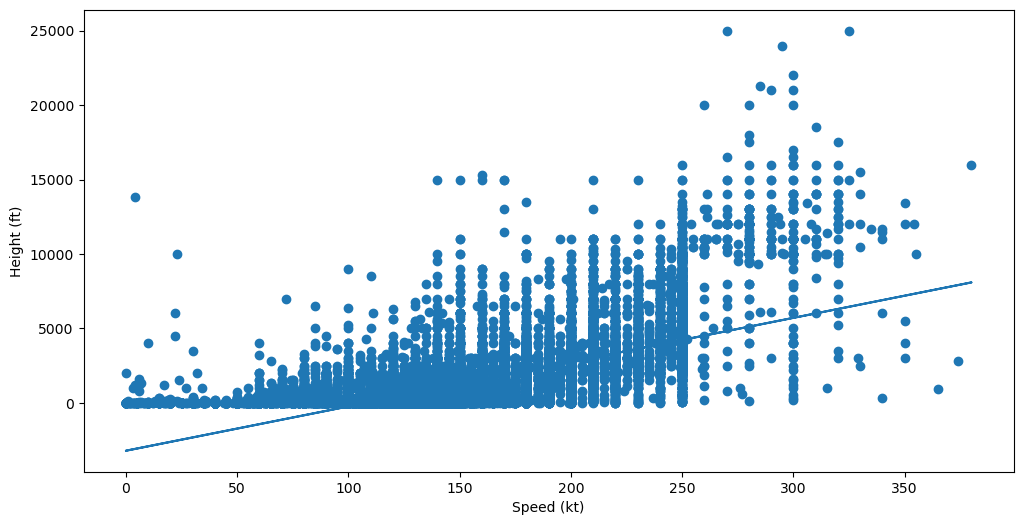

In [16]:
data = df[["Speed","Height"]].values
x = data[:,0]
y = data[:,1]
slope, intercept, r, p, std_err = stats.linregress(x, y)
slope = np.float32(slope)
model_y = [slope * i + intercept for i in x]

ax = plot_scatter(x,y,"Speed (kt)","Height (ft)")
ax.plot(x, model_y)

In [17]:
print(stats.linregress(x, y))
slope, intercept

LinregressResult(slope=29.759443723402875, intercept=-3220.5650630554815, rvalue=0.720944677813304, pvalue=0.0, stderr=0.11682288028315845, intercept_stderr=17.414076652862544)


(29.759443, -3220.5650630554815)

### 3 Continued
Interpret the results, what can you tell about the variables from the model? Can you make any useful predictions?
Evaluate your model. How good is the fit?

It is very interesting how the line follows through beyond y = 0 for the best fit. 

>Height = 30 * Speed - 3221 + error

What surprises me how there is a significant amount of values on or just above y = 0 suggesting that the aircrafts have a wildlife strike on the runway, building up speed before gaining any height.

With an intercept of -3221 and a slope of 30, we can say that starting at 0 (because you cannot have negative Height), for every 30kts gained we'd expect to see 1 more incident occur.

This would be better suited to a gentle exponential curve as the amount of wildlife strikes occuring beyond Speed = 250kts, it is fair less dense on the plot. 

### 4
I'm more so curious about the height of which a strikes occurs so lets pair that with other factors. I want to look deeper into this dataset though most of the columns are objects so I can clean these to look into them.

Examples could be:
 - Month
 - Species
 - Military/Commercial/Civil
 - Area 
 
###### Let's look at things from a military context.

In [18]:
df_military_flights = df.loc[(df["Operator"]== 'MILITARY'), ["Incident Year", "Height", "Speed", "Species Name"]]
df_military_flights

#ref: https://www.activestate.com/resources/quick-reads/how-to-slice-a-dataframe-in-pandas/

,Incident Year,Height,Speed,Species Name
3,1990,200.00000,138.00000,UNKNOWN MEDIUM BIRD
36,1990,1000.00000,145.00000,TURKEY VULTURE
37,1990,1800.00000,136.00000,UNKNOWN MEDIUM BIRD
57,1990,150.00000,180.00000,UNKNOWN MEDIUM BIRD
69,1990,0.00000,135.00000,LAUGHING GULL
79,1990,200.00000,138.00000,UNKNOWN MEDIUM BIRD
88,1990,1500.00000,150.00000,UNKNOWN MEDIUM BIRD
102,1990,1800.00000,220.00000,UNKNOWN MEDIUM BIRD
205,1990,750.00000,200.00000,UNKNOWN MEDIUM BIRD
235,1990,650.00000,150.00000,UNKNOWN MEDIUM BIRD


Given that the previous number of rows in the dataframe was 59960 and is now 58275, showing the vast majority of the wildlife strikes in the original dataframe were military.

From a brief overview of this data, I can see a lot of the species are classified as 'Unknown Medium Bird'. Let's look at this further.

In [19]:
df_military_flights = df_military_flights.loc[(df["Species Name"]== 'UNKNOWN MEDIUM BIRD')]
df_military_flights 

,Incident Year,Height,Speed,Species Name
3,1990,200.00000,138.00000,UNKNOWN MEDIUM BIRD
37,1990,1800.00000,136.00000,UNKNOWN MEDIUM BIRD
57,1990,150.00000,180.00000,UNKNOWN MEDIUM BIRD
79,1990,200.00000,138.00000,UNKNOWN MEDIUM BIRD
88,1990,1500.00000,150.00000,UNKNOWN MEDIUM BIRD
102,1990,1800.00000,220.00000,UNKNOWN MEDIUM BIRD
205,1990,750.00000,200.00000,UNKNOWN MEDIUM BIRD
235,1990,650.00000,150.00000,UNKNOWN MEDIUM BIRD
408,1990,0.00000,90.00000,UNKNOWN MEDIUM BIRD
877,1990,0.00000,130.00000,UNKNOWN MEDIUM BIRD


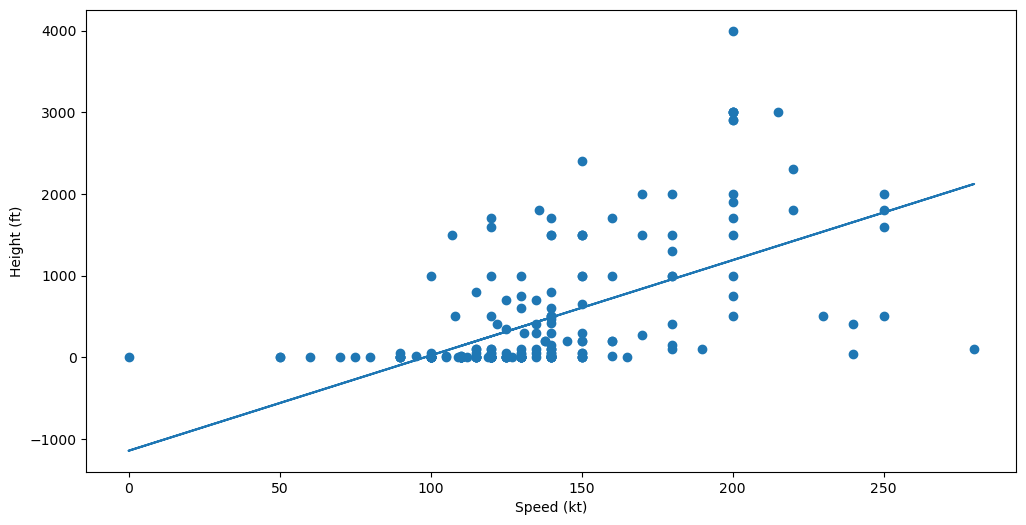

In [20]:
unknown_bird_data = df_military_flights[["Speed","Height"]].values
x = unknown_bird_data[:,0]
y = unknown_bird_data[:,1]
slope, intercept, r, p, std_err = stats.linregress(x, y)
slope = np.float32(slope)
model_y = [slope * i + intercept for i in x]

ax = plot_scatter(x,y,"Speed (kt)","Height (ft)")
ax.plot(x, model_y)

In [21]:
print(stats.linregress(x, y))
slope, intercept

LinregressResult(slope=11.675899785540816, intercept=-1146.894972200112, rvalue=0.5834486829615511, pvalue=1.833028212073718e-21, stderr=1.1007677587522697, intercept_stderr=155.61999894340235)


(11.6758995, -1146.894972200112)

###### Now lets refine and plot the Non-Military data of 'unknown medium bird'.

In [22]:
df_non_military_flights = df.loc[(df["Operator"] != 'MILITARY'), ["Incident Year", "Height", "Speed", "Species Name"]]
df_non_military_flights

,Incident Year,Height,Speed,Species Name
10,1990,60.00000,150.00000,GULL
14,1990,0.00000,140.00000,ROCK PIGEON
23,1990,300.00000,150.00000,SPARROW
46,1990,20.00000,175.00000,MALLARD
58,1990,2000.00000,190.00000,UNKNOWN LARGE BIRD
...,...,...,...,...
174093,2015,2000.00000,160.00000,UNKNOWN SMALL BIRD
174094,2015,10.00000,140.00000,UNKNOWN SMALL BIRD
174098,2015,2000.00000,210.00000,UNKNOWN SMALL BIRD
174100,2015,5000.00000,250.00000,UNKNOWN SMALL BIRD


In [23]:
df_non_military_flights = df_non_military_flights.loc[(df["Species Name"]== 'UNKNOWN MEDIUM BIRD')]
df_non_military_flights 

,Incident Year,Height,Speed,Species Name
129,1990,60.00000,105.00000,UNKNOWN MEDIUM BIRD
150,1990,3000.00000,230.00000,UNKNOWN MEDIUM BIRD
153,1990,100.00000,127.00000,UNKNOWN MEDIUM BIRD
155,1990,3000.00000,250.00000,UNKNOWN MEDIUM BIRD
165,1990,50.00000,130.00000,UNKNOWN MEDIUM BIRD
...,...,...,...,...
174061,2015,1700.00000,170.00000,UNKNOWN MEDIUM BIRD
174062,2015,500.00000,140.00000,UNKNOWN MEDIUM BIRD
174075,2015,1000.00000,125.00000,UNKNOWN MEDIUM BIRD
174085,2015,600.00000,145.00000,UNKNOWN MEDIUM BIRD


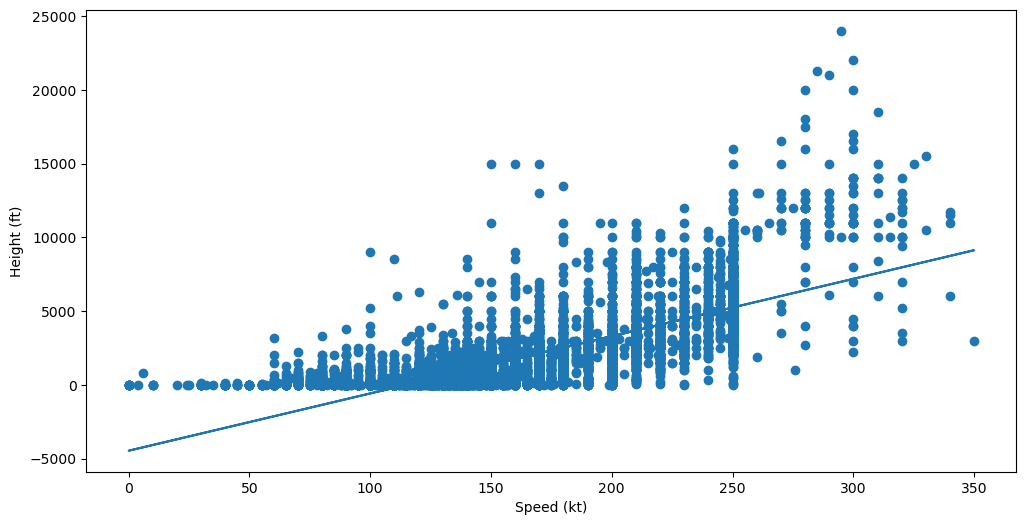

In [24]:
other_unknown_bird_data = df_non_military_flights[["Speed","Height"]].values
x = other_unknown_bird_data[:,0]
y = other_unknown_bird_data[:,1]
slope, intercept, r, p, std_err = stats.linregress(x, y)
slope = np.float32(slope)
model_y = [slope * i + intercept for i in x]

ax = plot_scatter(x,y,"Speed (kt)","Height (ft)")
ax.plot(x, model_y)

In [25]:
print(stats.linregress(x, y))
slope, intercept

LinregressResult(slope=38.81737268090931, intercept=-4458.484056797911, rvalue=0.7698435257701003, pvalue=0.0, stderr=0.30524459011798805, intercept_stderr=52.58269365841174)


(38.81737, -4458.484056797911)

###### The non-military data had a lot less rows. Alternatively we could look at the type of birds that unfortunately get striked by aircraft. Lets have a look.

In [26]:
#df_non_military_flights = df.loc[(df["Operator"] != 'MILITARY'), ["Incident Year", "Height", "Speed", "Species Name"]]
#df_non_military_flights
df_non_military_new = df.loc[(df["Operator"] != 'MILITARY'), ["Incident Year", "Height", "Speed", "Species Name"]]
df_non_military_new = df_non_military_new.loc[(df["Species Name"] != 'UNKNOWN LARGE BIRD'), ["Incident Year", "Height", "Speed", "Species Name"]]
df_non_military_new = df_non_military_new.loc[(df["Species Name"] != 'UNKNOWN MEDIUM BIRD'), ["Incident Year", "Height", "Speed", "Species Name"]]
df_non_military_new = df_non_military_new.loc[(df["Species Name"] != 'UNKNOWN SMALL BIRD'), ["Incident Year", "Height", "Speed", "Species Name"]]
df_non_military_new = df_non_military_new.loc[(df["Species Name"] != 'UNKNOWN BIRD'), ["Incident Year", "Height", "Speed", "Species Name"]]
df_non_military_new

,Incident Year,Height,Speed,Species Name
10,1990,60.00000,150.00000,GULL
14,1990,0.00000,140.00000,ROCK PIGEON
23,1990,300.00000,150.00000,SPARROW
46,1990,20.00000,175.00000,MALLARD
64,1990,10000.00000,250.00000,HAWK
...,...,...,...,...
174026,2015,300.00000,145.00000,CHIMNEY SWIFT
174052,2015,10.00000,10.00000,ROCK PIGEON
174069,2015,5500.00000,250.00000,INDIGO BUNTING
174086,2015,0.00000,110.00000,BARN SWALLOW


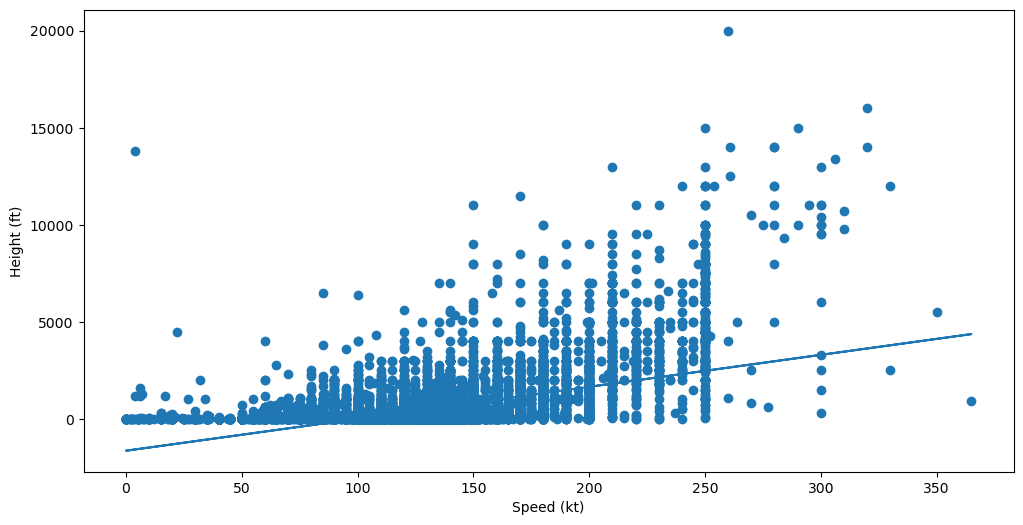

In [30]:
known_bird_data = df_non_military_new[["Speed","Height"]].values
x = known_bird_data[:,0]
y = known_bird_data[:,1]
slope, intercept, r, p, std_err = stats.linregress(x, y)
slope = np.float32(slope)
model_y = [slope * i + intercept for i in x]

ax = plot_scatter(x,y,"Speed (kt)","Height (ft)")
ax.plot(x, model_y)

In [31]:
print(stats.linregress(x, y))
slope, intercept

LinregressResult(slope=16.465132104226672, intercept=-1642.0778469317136, rvalue=0.5677517493722305, pvalue=0.0, stderr=0.15148249130713407, intercept_stderr=19.88253361829339)


(16.465132, -1642.0778469317136)

### Comparison of Data - Birds
- y intercept irrelevant on these as they are all negative.
- x intercept is important to me as this is the densest area.
(Slope, intercept)

Military, unknown medium birds
(11.6758995, -1146.894972200112)
>Height = 12 * Speed - 1147 + error
x intercept = 96kts

- All of these wildlife strikes are species unrecorded wildlife strikes. 

Non-military, unknown medium bird
(38.81737, -4458.484056797911)
>Height = 39 * Speed - 4458 + error
x intercept = 114kts

- All of these wildlife strikes are species unrecorded wildlife strikes. 

Non-military, known birds
(16.465132, -1642.0778469317136)
>Height = 16 * Speed - 1642 + error
x intercept = 103kts

Given the extent of this dataset, it isn't suprising to see that the majority of these incidents occurred at a low height (on the runway most likely). However the visual look of the slope is generally is quite interesting on them all as the slope remains low despite there being an exponential spread on all of the plots. This identifies how extreme the strikes occur at a lower height and lower speed. 
I could suggest that, given the x intercepts, that perhaps with a lower speed, the military are less likely to deciepher that a strike has occurred in the build up to flight as the x intercept is the lowest on the unknown medium birds plot. 

Though this linear model isn't a suitable fit. An exponential plot would be much better given the nature of all three in this case.

### 4 Continued: Regression Model

Though 'Incident Year' could be thought of as continuous if the data continued to be collected/ was endless, but in this context the years are essentially numerically classified. This is the only other variable that would work for a multiple regression model with this dataset.

In [33]:
df["Incident Year"].unique()
#25 years to look across

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015], dtype=int64)

In [37]:
from sklearn import linear_model 
from sklearn.metrics import mean_squared_error, r2_score 
x = df[['Speed','Incident Year']]
y = df['Height'] 
regr = linear_model.LinearRegression()
regr.fit(x, y) 
print(regr.coef_, regr.intercept_,regr.score(x, y)) 

[29.75990966 -0.03970757] -3141.0156584099227 0.5197612505358054


For every incident year, we expect to see a loss of 0.04ft in height at every wildlife strike occurence.  

For every 1kt of speed, we expect to see a height gain of 30kts for every wildlife strike to occur on average.
This essentially identifies the progression of aircraft manufacturing if the height continously gains and we continue to record wildlife strikes to this extent.

Ref: https://towardsdatascience.com/interpreting-the-coefficients-of-linear-regression-cc31d4c6f235

The regression prediction essentially predicts what year we will see an aircraft at this height and this speed which can then be looked at against the linear model.

In [34]:
regr.predict([[800,2000]])


C:\Users\luoco\Miniconda3\envs\STEM\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2026.91393199])

### 5: Ethical Issues
#### What ethical issues may arise from using these models to make predictions?
- It would be assumed that aircraft are incrementally going to improve in height and speed. This cannot be assumed in the occurence of wildlife strikes realistically because it doesn factor in cases where (for example) a strike may occur during a crash, or a flight path change such as diverting to a different airport. The plots do not factor in the 'why' a strike may have occurred. 
- It is very subject to location where you may have different species of birds living in certain areas, then you would have to factor in the protection of that species. 
- The records are very inconsistent. Though it does appear that the military do make records when possible even if the bird is unidentified.

#### What extra data would improve your current models, or allow you to make better, different models?
- (more variables, better variables). The dataset has a majority of classified data as opposed to numeric. For example, though it specifies the aircraft type, if the data was apprent for the weight of the aircraft than just the name, this could be modelled against other factors. 
- The native area of the bird could prove to be useful. If certain species are found to be located near an airport, in certain flight levels (altitudes), or where they are native to. This could prove benefit for wildlife protection.
- The flight time. This would be numeric and continous to the point of the longest commercial flight. It could be made apparrent to identify where the wildlife strikes occur, in flight or on runway.
- The data could be merged for each year. As opposed to having each case, the amount per year could be identified as opposed to who is recording these cases and there help prevent them from occuring.
- I could also look at speed against location to see if aircraft are flying faster in certain locations where wildlife strikes occur.
- I would also remove the line of the linear model below y = 0 as where y is negative in height for some of the plots, it takes this into consideration for the averages which isn't realistic.